Multiple Linear Regression

In [1]:
#Importing the necessary packages

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
class Linear_Regression():
    
    def __init__(self):
        self.X = None
        self.y = None
        self.w = None

    def fcnAddBias(self, x):
        return np.hstack((np.ones(len(x))[:,np.newaxis],x))
    
    def fcnCalculateRegressionParameters(self, x, y):
        if len(x.shape) == 1:
            x = x[:,np.newaxis]
        if len(y.shape) == 1:
            y = y[:,np.newaxis]
        x = self.fcnAddBias(x)
        weight = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

        return weight
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.w = self.fcnCalculateRegressionParameters(X, y)
        return self
        
    def predict(self, X):
        X = self.fcnAddBias(X)
        return np.dot(X, self.w)

In [3]:
#Prediction and Error Metrics calculation

def fcnCalculateSSE(yActual, yPredicted):
    return np.sum((yActual - yPredicted) ** 2)

def fcnCalculateSST(yActual, yPredicted):
    return np.sum((yPredicted - np.mean(yActual)) ** 2)

def fcnCalculateR(yActual, yPredicted):
    return 1 - (fcnCalculateSSE(yActual, yPredicted)/fcnCalculateSST(yActual, yPredicted))
    
def fcnCalculateMSE(yActual, yPredicted):
    return np.mean((yActual - yPredicted) ** 2)

In [4]:
data = pd.read_csv("mpg_data.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,category,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,low,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,Medium,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,low,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,low,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,low,ford galaxie 500


In [5]:
#Extracting the numerical features from pd to np

col = data.columns
we = data.to_numpy()
we = we[:,0:8]
we = we.astype(np.float64)
we

array([[ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       [ 16. ,   8. , 304. , ...,  12. ,  70. ,   1. ],
       ...,
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ],
       [ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ]])

In [6]:
#Splitting the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = we[:,1:]
y = we[:,0]
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
#Analysing the parameters using different methods

In [8]:
lin_reg = Linear_Regression()
lin_reg.fit(x_train, y_train)

In [9]:
weight = lin_reg.w
weight

array([[23.46623053],
       [-0.25958907],
       [ 1.67568534],
       [-0.63586073],
       [-5.87598805],
       [ 0.25011023],
       [ 2.660222  ],
       [ 1.04573421]])

In [10]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

print("The weight vector : {} and intercept is : {}".format(linear_model.coef_, linear_model.intercept_))

The weight vector : [-0.25958907  1.67568534 -0.63586073 -5.87598805  0.25011023  2.660222
  1.04573421] and intercept is : 23.466230525748347


In [11]:
#Executing the model and calculating the error

yPredicted = lin_reg.predict(x_train)
yPredicted_test = lin_reg.predict(x_test)

In [12]:
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test)

In [17]:
print("Train MSE: {}".format(fcnCalculateMSE(y_train[:,np.newaxis], yPredicted)))
print("Test MSE: {}".format(fcnCalculateMSE(y_test[:,np.newaxis], yPredicted_test)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train MSE: 11.76285033130064
Test MSE: 7.57683634255529
SSE: 598.5700710618679, SST: 3873.8135554327514, R2: 0.8454829943422508


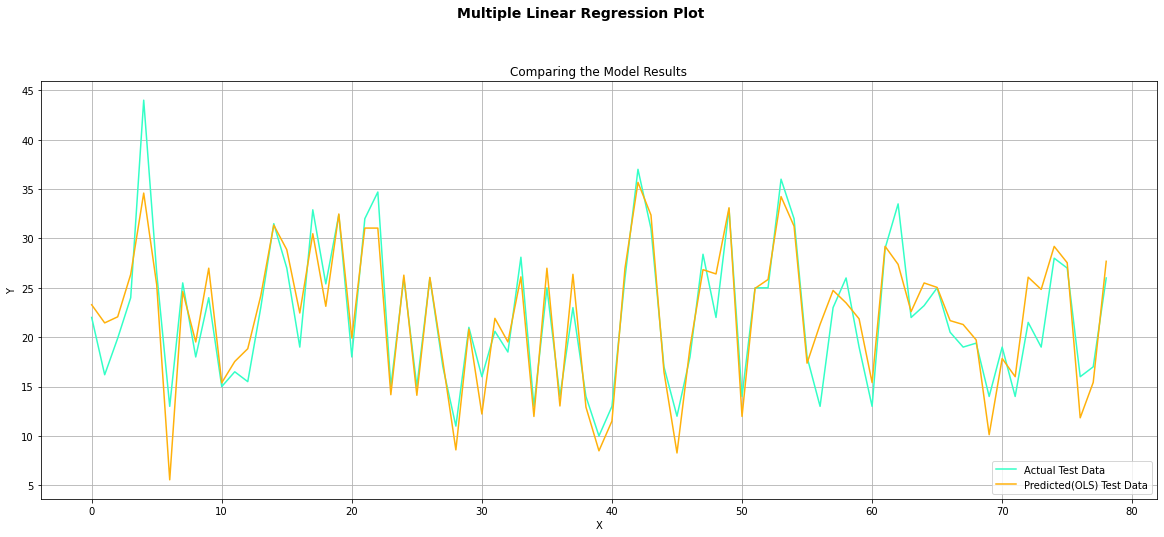

In [22]:
#Plotting all the datapoints

fig = plt.figure(figsize=(20,8))
fig.suptitle("Multiple Linear Regression Plot", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.85)
ax.set_title("Comparing the Model Results")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.grid(True)
plt.plot(y_test , color='#33FFC7',label = 'Actual Test Data')
plt.plot(yPredicted_test, color='#FFB10B', label = "Predicted(OLS) Test Data")
plt.legend(loc=4)
plt.show()